# Bagging Machine Learning Algorithm

### **B**ootstrap **Agg**regat**ing** or [Bagging](https://en.wikipedia.org/wiki/Bootstrap_aggregating)
* [Scikit- Learn Reference](http://scikit-learn.org/stable/modules/ensemble.html#bagging)
* Bootstrap sampling: Sampling with replacement
* Combine by averaging the output (regression)
* Combine by voting (classification)
* Can be applied to many classifiers which includes ANN, CART, etc.

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [0]:
df = sns.load_dataset('titanic')

In [0]:
df.shape

(891, 15)

In [0]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [0]:
# df.dropna(inplace=True)

In [0]:
df['pclass'].unique()

array([3, 1, 2])

In [0]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [0]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [0]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

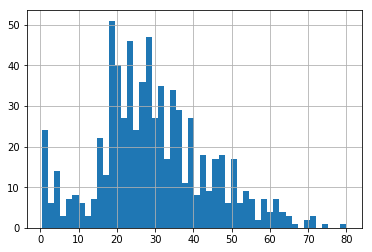

In [0]:
df['age'].hist(bins=50);

## Data Pre-processing

In [0]:
subset = df[['pclass', 'sex', 'age', 'survived']].copy()
subset.dropna(inplace=True)

In [0]:
X = subset[['pclass', 'sex', 'age']].copy()

In [0]:
from sklearn import preprocessing
# lb = preprocessing.LabelBinarizer()
le = preprocessing.LabelEncoder()

In [0]:
X['sex'] = le.fit_transform(subset['sex'])

In [0]:
X.head()

,pclass,sex,age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


In [0]:
X.shape

(714, 3)

In [0]:
X.describe()

,pclass,sex,age
count,714.000000,714.000000,714.000000
mean,2.236695,0.634454,29.699118
std,0.838250,0.481921,14.526497
min,1.000000,0.000000,0.420000
25%,1.000000,0.000000,20.125000
50%,2.000000,1.000000,28.000000
75%,3.000000,1.000000,38.000000
max,3.000000,1.000000,80.000000


In [0]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 3 columns):
pclass    714 non-null int64
sex       714 non-null int64
age       714 non-null float64
dtypes: float64(1), int64(2)
memory usage: 22.3 KB


In [0]:
y = subset['survived'].copy()

In [0]:
y.value_counts()

0    424
1    290
Name: survived, dtype: int64

# Fit Model

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))
        

## Decision Tree

In [0]:
clf = DecisionTreeClassifier(random_state=42)

In [0]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [0]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print("\n********************************\n")
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9158

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       286
           1       0.97      0.83      0.89       213

    accuracy                           0.92       499
   macro avg       0.93      0.90      0.91       499
weighted avg       0.92      0.92      0.91       499


Confusion Matrix: 
 [[281   5]
 [ 37 176]]

ROC AUC: 0.9044

Average Accuracy: 	 0.7997
Accuracy SD: 		 0.0327

********************************

Test Result:

accuracy score: 0.8047

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       138
           1       0.73      0.73      0.73        77

    accuracy                           0.80       215
   macro avg       0.79      0.79      0.79       215
weighted avg       0.80      0.80      0.80       215


Confusion Matrix: 
 [[117  21]
 [ 21  56]]

ROC AUC: 0.7875



***

## Bagging (oob_score=False)

In [0]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [0]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=42,
                                                        splitter='best'),
      

In [0]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print("\n********************************\n")
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9158

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       286
           1       0.97      0.83      0.89       213

    accuracy                           0.92       499
   macro avg       0.93      0.90      0.91       499
weighted avg       0.92      0.92      0.91       499


Confusion Matrix: 
 [[281   5]
 [ 37 176]]

ROC AUC: 0.9044

Average Accuracy: 	 0.7997
Accuracy SD: 		 0.0327

********************************

Test Result:

accuracy score: 0.8047

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       138
           1       0.73      0.73      0.73        77

    accuracy                           0.80       215
   macro avg       0.79      0.79      0.79       215
weighted avg       0.80      0.80      0.80       215


Confusion Matrix: 
 [[117  21]
 [ 21  56]]

ROC AUC: 0.7875



***

## Bagging (oob_score=True)

Use out-of-bag samples to estimate the generalization accuracy

In [0]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                            bootstrap=True, oob_score=True,
                            n_jobs=-1, random_state=42)

In [0]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=42,
                                                        splitter='best'),
      

In [0]:
bag_clf.oob_score_

0.8016032064128257

In [0]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print("\n********************************\n")
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9158

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       286
           1       0.97      0.83      0.89       213

    accuracy                           0.92       499
   macro avg       0.93      0.90      0.91       499
weighted avg       0.92      0.92      0.91       499


Confusion Matrix: 
 [[281   5]
 [ 37 176]]

ROC AUC: 0.9044

Average Accuracy: 	 0.7997
Accuracy SD: 		 0.0327

********************************

Test Result:

accuracy score: 0.8047

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       138
           1       0.73      0.73      0.73        77

    accuracy                           0.80       215
   macro avg       0.79      0.79      0.79       215
weighted avg       0.80      0.80      0.80       215


Confusion Matrix: 
 [[117  21]
 [ 21  56]]

ROC AUC: 0.7875



***